<a href="https://colab.research.google.com/github/FKz11/test_tasks/blob/main/yandex_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Тренировочный

### Генератор точек в круге

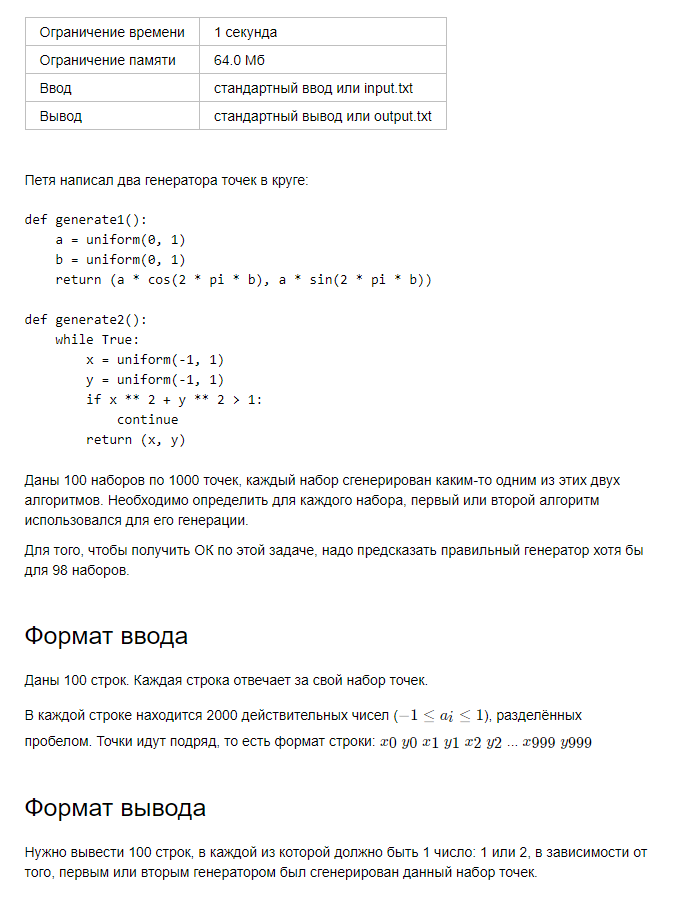

In [ ]:
from random import *
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

In [ ]:
for i in range(100):
  ls = input()
  if len(ls) == 0:
    continue
  x = list(map(float, ls.split()))[::2]
  math_e = sum(x)/len(x)
  s_dev = (sum((i - math_e)**2 for i in x)/len(x))**(1/2)
  if s_dev < 0.45:
    print(1)
  else:
    print(2)

### Сумма на гранях

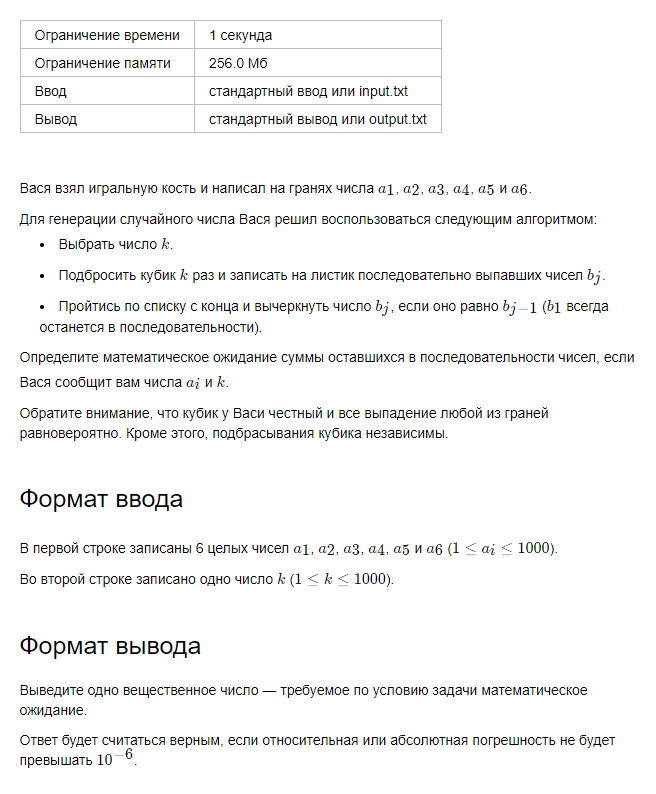

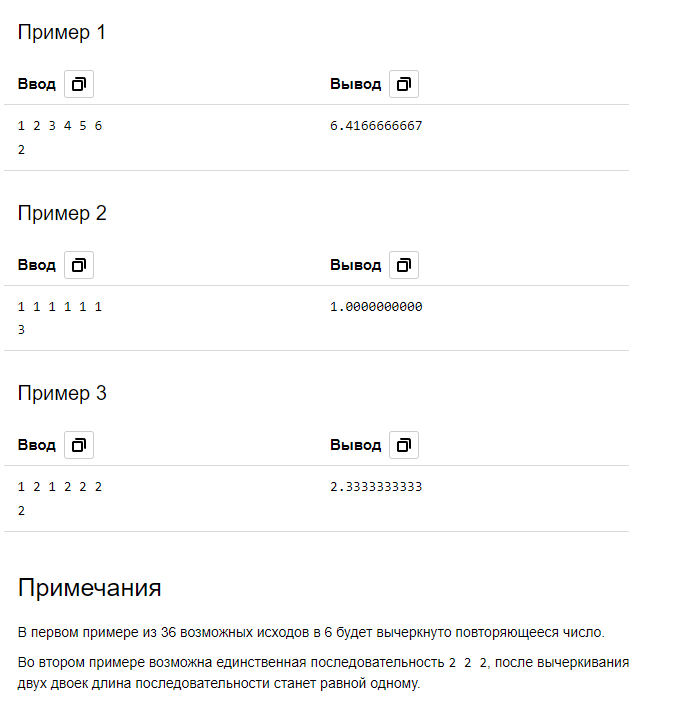

In [ ]:
a = list(map(int, input().split()))
k = int(input())

s1 = sum(a)/len(a)
s2 = 0
for ai in a:
  for aj in a:
    if ai != aj:
      s2 = s2 + ai + aj
    else:
      s2 = s2 + ai
s2 = s2/(len(a)*len(a))

s_add = s2-s1

print(s1 + s_add*(k-1))

### Большая семья бабушки Алевтины

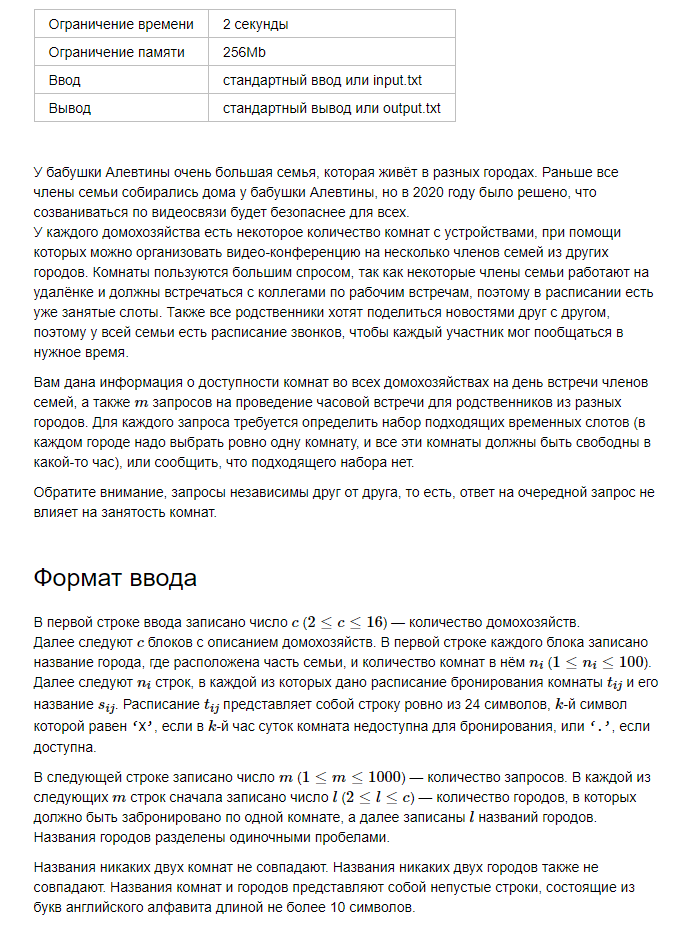

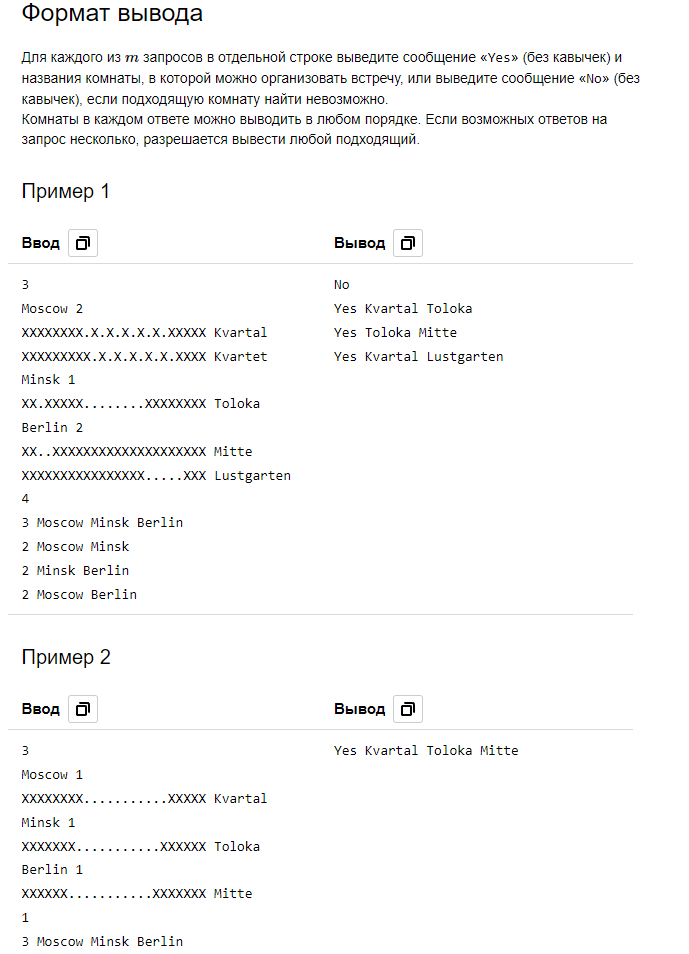

In [ ]:
with open('input.txt', 'r') as file_in:
  data = file_in.read().split('\n')
num_towns = int(data[0])
towns_streets = dict()
streets_calls = dict()
i = 1
for j in range(num_towns):
  data_i = data[i].split()
  num_srteets = int(data_i[1])
  towns_streets[data_i[0]] = [data[q].split()[1] for q in range(i+1, i+1+num_srteets)]
  for k in range(num_srteets):
    i += 1
    data_i = data[i].split()
    streets_calls[data_i[1]] = list(data_i[0])
  i += 1
res = ''
quess = [st.split()[1:] for st in data[i+1:i+1+int(data[i])]]
for ques in quess:
  for j in range(24):
    res_streets = []
    for town in ques:
      flag = False
      for street in towns_streets[town]:
        if streets_calls[street][j] == '.':
          flag = True
          res_streets.append(street)
          break
      if not flag:
        break
    if flag:
      res += 'Yes '
      res += ' '.join(res_streets)
      break
  if not flag:
    res += 'No'
  res += '\n'
with open('output.txt', 'w') as file_out:
  file_out.write(res[:-1])

### Коллекция статуэток

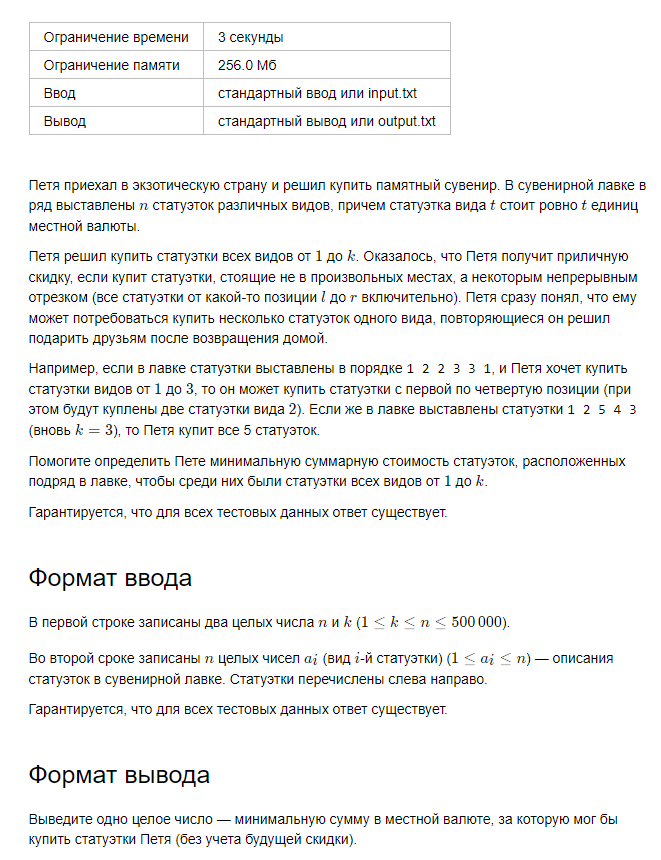

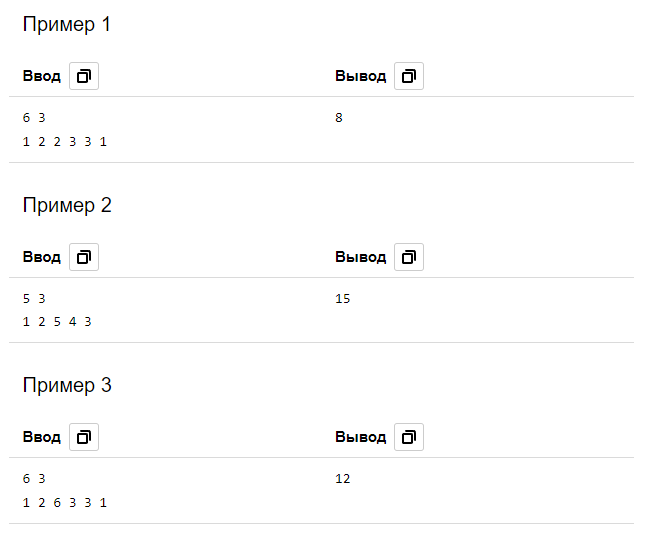

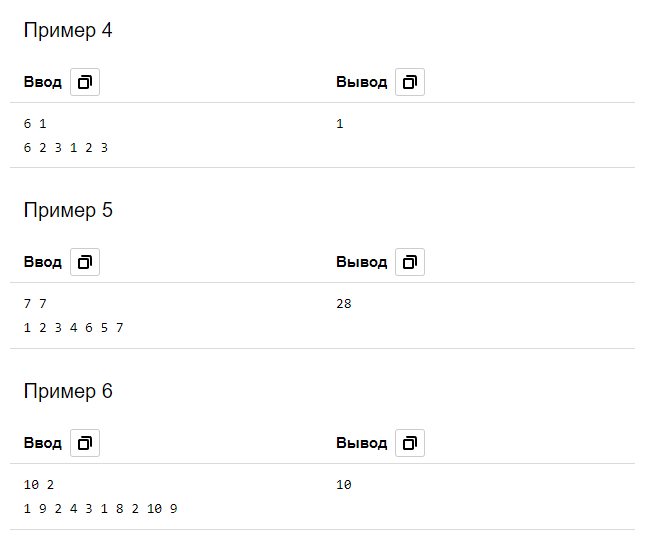

In [ ]:
import time
st = time.time()
data = input().split()
n = int(data[0])
k = int(data[1])
inpt = input()
ls = [int(i) for i in inpt.split()]
if k == 1:
  print(1)
else:
  indexs = [[] for _ in range(k)]
  indexs.sort(key = lambda x: len(x))
  for i in range(n):
    if ls[i] <= k:
      indexs[ls[i]-1].append(i)
  sort_indexs = [i for j in indexs for i in j]
  sort_indexs.sort()
  len_sort_index = len(sort_indexs)
  s_min = 0
  flag_2 = True
  sum_list = [sum(ls[sort_indexs[i]+1:sort_indexs[i+1]+1]) for i in range(len_sort_index-1)]
  str_len = sort_indexs.index(max((map(min, indexs))))
  s = ls[sort_indexs[0]] + sum(sum_list[:str_len-1])
  for i in range(sort_indexs.index(min((map(max, indexs))))+1):
    """
    if (time.time() - st) > 2.8:
      flag_2 = False
      print(s_min)
      break
    """
    for j in range(str_len, len_sort_index):
      j_1 = j-1
      if sort_indexs[i] == sort_indexs[j]:
        s += sum_list[j_1]
        str_len += 1
        continue
      s += sum_list[j_1]
      if s < s_min or s_min == 0:
        for ind in indexs:
          flag = False
          for i_ind in ind:
            if sort_indexs[i] <= i_ind <= sort_indexs[j]:
              flag = True
              break
          if not flag:
            break
        if flag:
          s_min = s
          break
        str_len += 1
      else:
        break
    s = s - sum_list[i] - ls[sort_indexs[i]] + ls[sort_indexs[i+1]] - sum_list[j_1]
  if flag_2:
    print(s_min)

6 3
1 2 2 3 3 1
8


In [ ]:
s_min = sum(ls[min(map(min, indexs)):max(map(min, indexs))+1])
print(s_min)

8


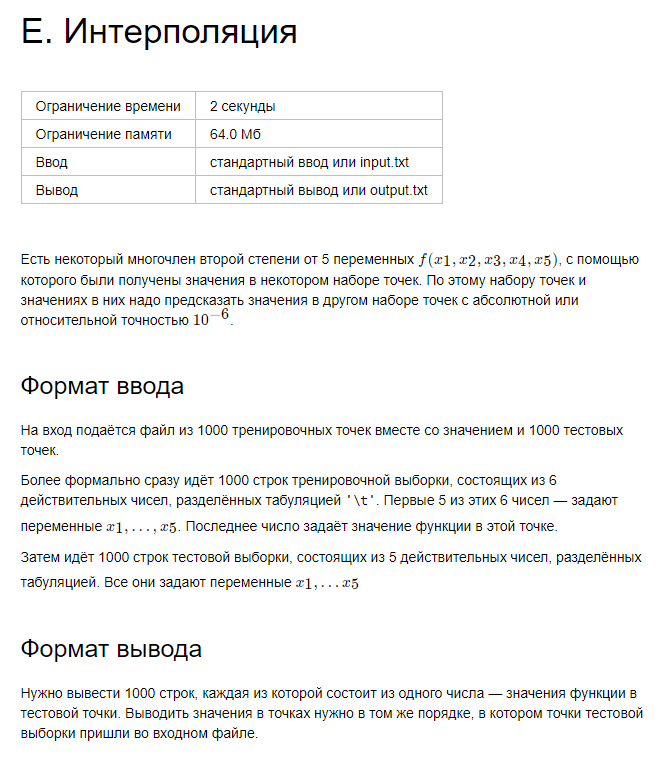

In [ ]:
import numpy as np

def get_pol(x, y, z, m, k):
  ls = []
  for xx in range(3):
    for yy in range(3):
      for zz in range(3):
        for mm in range(3):
          for kk in range(3):
            ls.append((x**xx)*(y**yy)*(z**zz)*(m**mm)*(k**kk))
  return ls

with open('input.txt', 'r') as file_in:
  data = file_in.read().split('\n')
data_train = data[:1000]
data_test = data[1000:]
train_xyzmk = []
test_xyzmk = []
train_f = []
for i in range(1000):
  data_i = list(map(float, data_train[i].split('\t')))
  train_xyzmk.append(data_i[:5])
  train_f.append(data_i[5])
  test_xyzmk.append(list(map(float, data_test[i].split('\t'))))
A = np.array([get_pol(i[0], i[1], i[2], i[3], i[4]) for i in train_xyzmk[:243]])
B = np.array(train_f[:243])
X = np.linalg.inv(A)@B
A_test = np.array([get_pol(i[0], i[1], i[2], i[3], i[4]) for i in test_xyzmk])
B_test = A_test@X
res = '\n'.join(B_test.astype(str))
with open('output.txt', 'w') as file_out:
  file_out.write(res)

## Основной

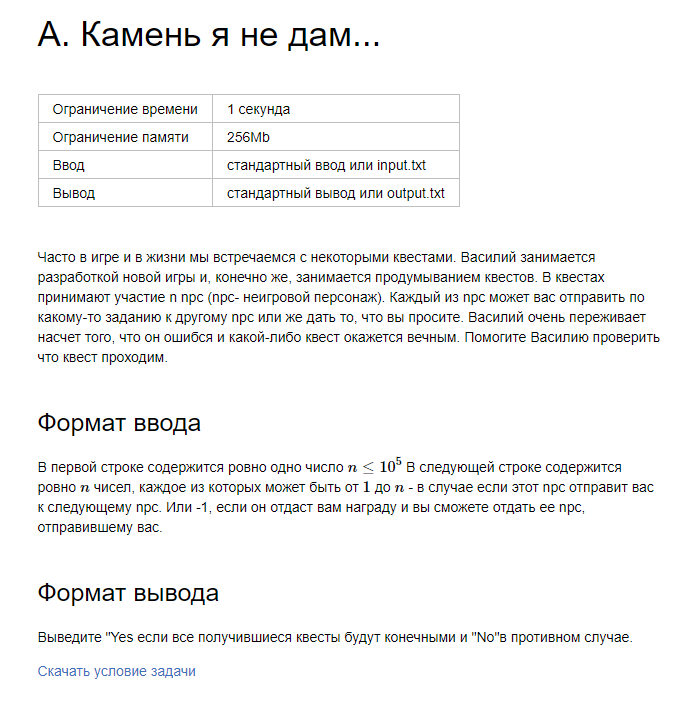

In [ ]:
import time
st = time.time()
n = int(input())
ls = list(map(int, input().split()))
mask_all = [False]*n

for i in range(n):
  mask_loc = [False]*n
  flag = True
  j = i
  if (time.time() - st) > 0.9:
      flag_2 = False
      print("No")
      break
  while flag:
    if not mask_all[j]:
      mask_all[j] = True
      mask_loc[j] = True
      if ls[j] == -1:
        break
      elif mask_loc[ls[j]-1]:
        flag = False
      else:
        j = ls[j]-1
    else:
      break
  if not flag:
    print("No")
    break
else:
    print("Yes")

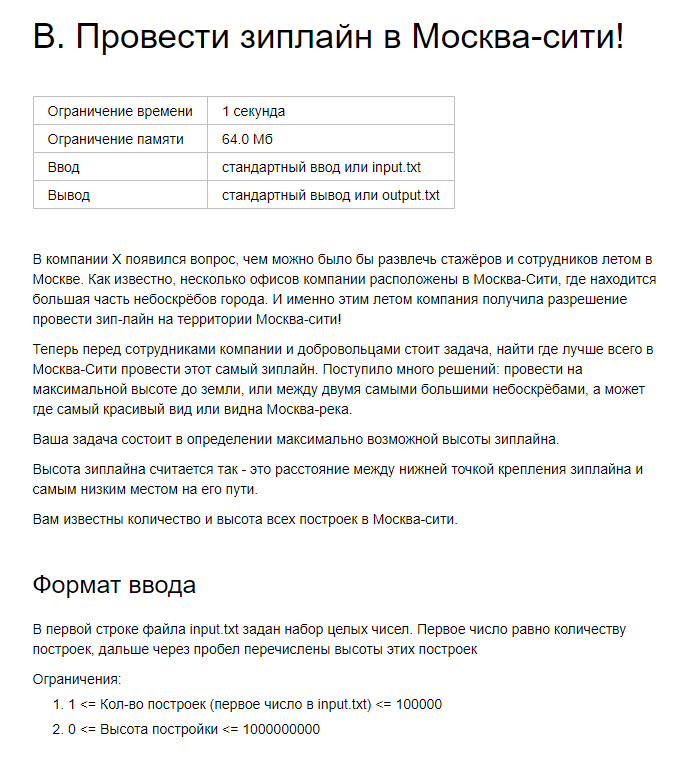

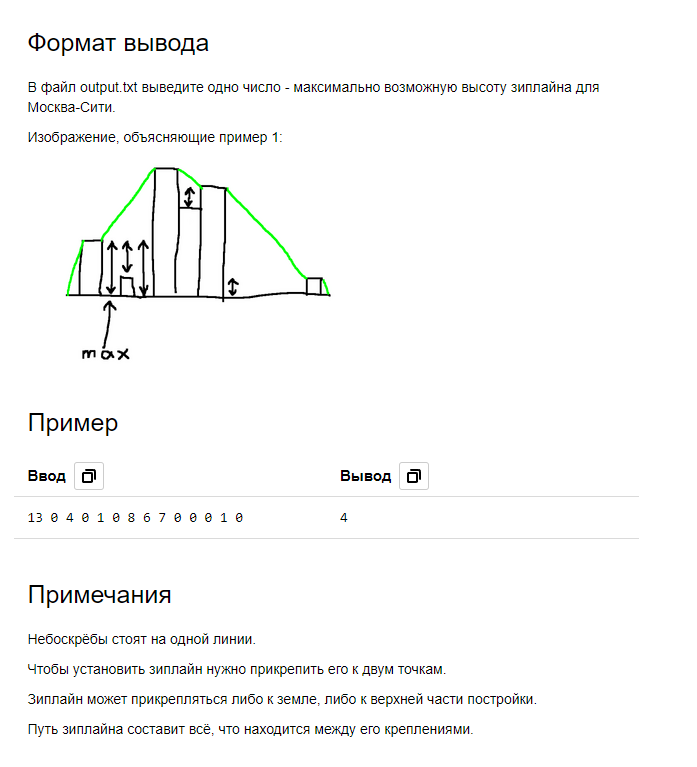

In [ ]:
import numpy as np
data = list(map(int, input().split()))
n = data[0]
ls = np.array(data[1:])
max_index = list(range(n))
max_index.sort(key = lambda x: ls[x], reverse=True)
s_max = 0
max = 0
b = max_index[0]
for i in range(1, n):
  a = b
  b = max_index[i]
  l_min = min(ls[a], ls[b])
  if l_min < s_max:
    break
  if b > a:
    max = (l_min - ls[a:b]).max()
  else:
    max = (l_min - ls[b:a]).max()
  if max > s_max:
    s_max = max
print(s_max)

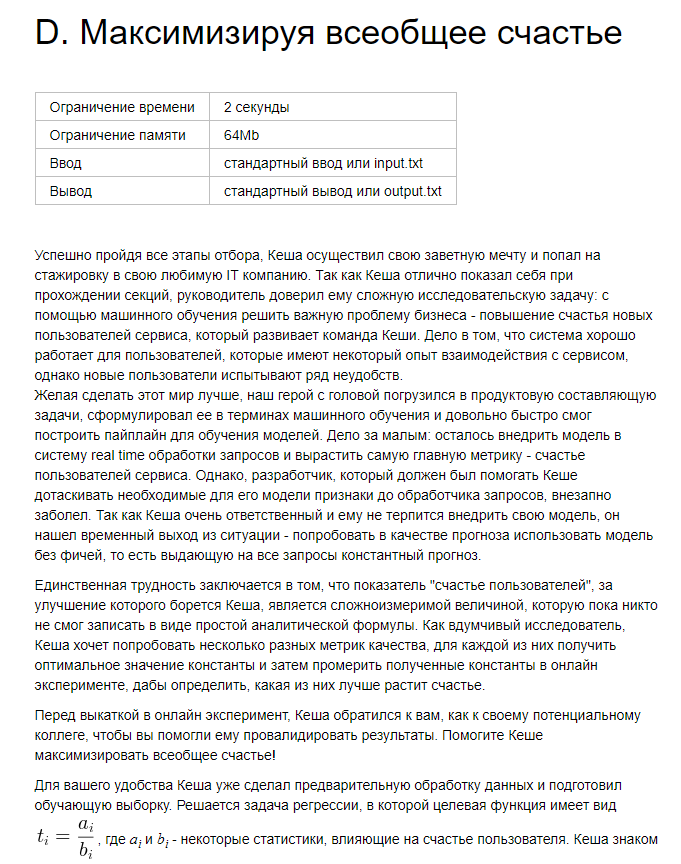

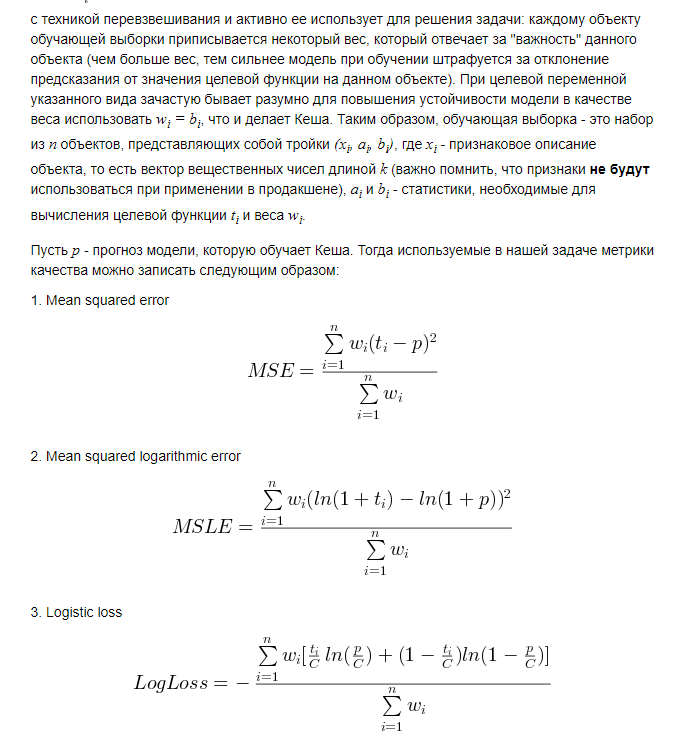

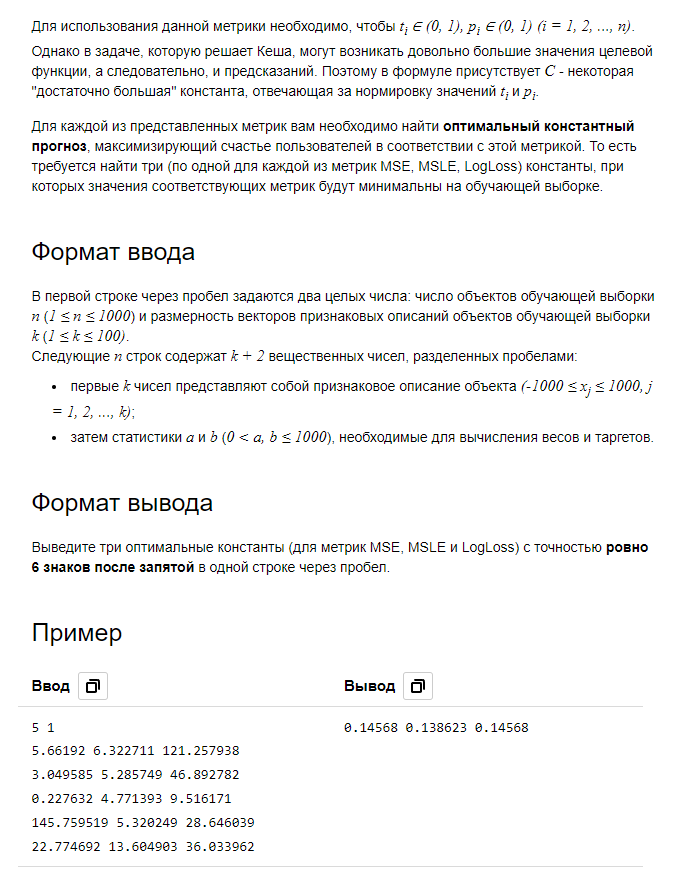

In [ ]:
import numpy as np
with open('input.txt', 'r') as file_in:
  data = file_in.read().split('\n')
data_1 = list(map(int, data[0].split()))
n = data_1[0]
k = data_1[1]
t_ls = []
w_ls = []
for i in range(n):
  data_2 = list(map(float, data[i+1].split()))
  a = data_2[-2]
  b = data_2[-1]
  t_ls.append(a/b)
  w_ls.append(b)
t_ls = np.array(t_ls)
w_ls = np.array(w_ls)
p_mse = sum(t_ls*w_ls)/sum(w_ls)
x_msle = sum(w_ls*np.log(1+t_ls))/sum(w_ls)
p_msle = np.exp(x_msle)-1
print(p_mse, p_msle, p_mse)

0.145679627696649 0.13862254095243398 0.145679627696649


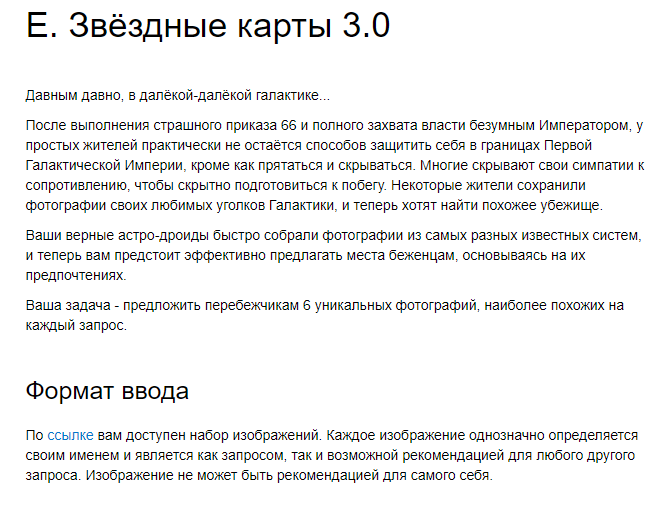

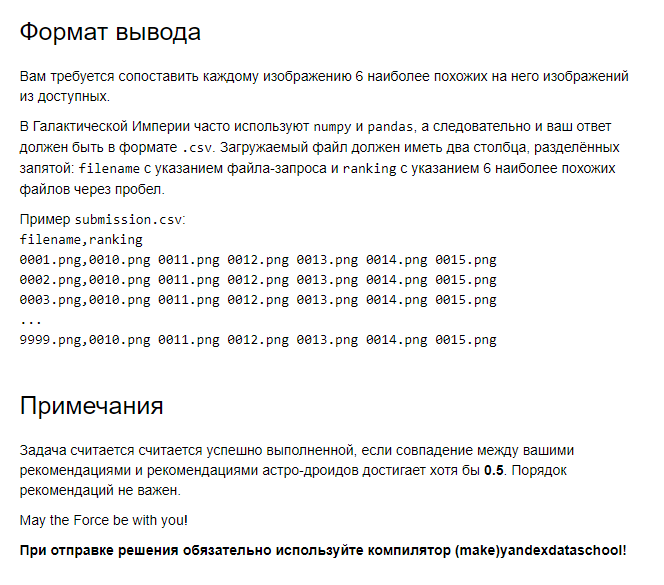

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tt
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [ ]:
!unzip -qq '/content/gdrive/MyDrive/Colab Notebooks/dataset.zip'

In [ ]:
k = 6

In [ ]:
data_names = []
for names in os.listdir("./dataset"):
  data_names.append("./dataset/" + names)
data_names.sort()

In [ ]:
data_names[0]

'./dataset/0000.png'

In [ ]:
data_names[-1]

'./dataset/9604.png'

In [ ]:
n = len(data_names)

In [ ]:
data_imgs = []
for i in tqdm(range(n)):
  data_imgs.append(plt.imread(data_names[i]))

100%|██████████| 9605/9605 [01:03<00:00, 152.39it/s]


<ipython-input-8-b94f9e3893be>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  plt.imshow(torch.tensor([data_imgs[5], data_imgs[5], data_imgs[5]]).permute(1, 2, 0).numpy())


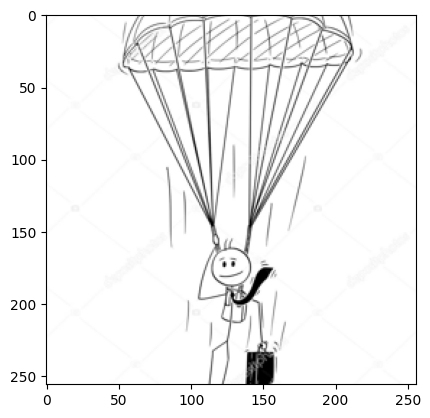

In [ ]:
plt.imshow(torch.tensor([data_imgs[5], data_imgs[5], data_imgs[5]]).permute(1, 2, 0).numpy())
plt.show()

In [ ]:
class Dataset_dt(Dataset):
    def __init__(self, data_imgs):
      
        self.data_imgs = data_imgs

    def __getitem__(self, index):

        img = self.data_imgs[index]
        if len(img.shape) == 2:
          img = torch.tensor([img, img, img])
        else:
          img = torch.tensor(img).permute(2, 0, 1)

        return img

    def __len__(self):
        return len(self.data_imgs)

In [ ]:
SIZE = (256, 256)

In [ ]:
data_dataset = Dataset_dt(data_imgs)

In [ ]:
batch_size = 15

In [ ]:
data_loader = DataLoader(data_dataset, batch_size, shuffle=False)

In [ ]:
modl = torchvision.models.resnet152(pretrained=True).to('cuda')
VGG16 = torch.nn.Sequential(*(list(modl.children())[:-1]))
VGG16.eval()

In [ ]:
embedings = []
for imgs in tqdm(data_loader):
  emmbds = VGG16(imgs.to('cuda'))
  embedings.extend(emmbds.detach().cpu())
  torch.cuda.empty_cache()
  VGG16.zero_grad()

100%|██████████| 641/641 [02:16<00:00,  4.68it/s]


In [ ]:
knn = NearestNeighbors(n_neighbors=(k+1))

In [ ]:
emmm = [np.hstack(rr.numpy())[0] for rr in embedings]

In [ ]:
knn.fit(emmm)

In [ ]:
res_knn = knn.kneighbors(emmm)[1]
res_knn

In [ ]:
res = []
for i in range(n):
  res.append([data_names[i][-8:], ' '.join([data_names[j][-8:] for j in res_knn[i][1:]])])
res[0]

In [ ]:
pd_res = pd.DataFrame(res, columns=['filename', 'ranking'])
pd_res.head()

In [ ]:
pd_res.to_csv('submission.csv', sep=',',index=False)